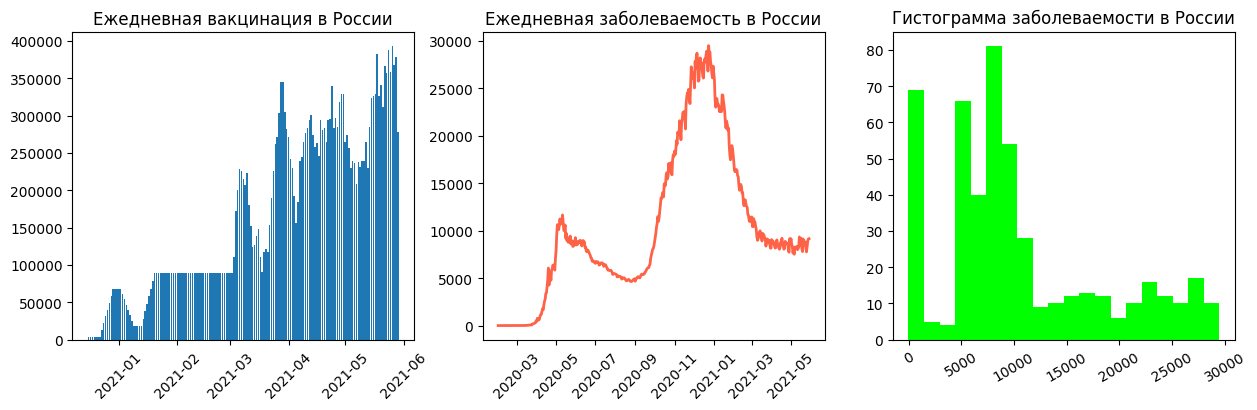

In [63]:
import pandas as pd

covid_data = pd.read_csv('data_2/covid_data.csv', sep=',')
#display(covid_data.head())
#covid_data = covid_data.groupby(
 #   ['date'])

#display(covid_data.head())
#display(covid_data.tail())

vaccinations_data = pd.read_csv('data_2/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]

#display(vaccinations_data)

covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()
#display(covid_data.head())
#display(covid_data.tail())
covid_data['date'] = pd.to_datetime(covid_data['date'])
#display(covid_data.head())

covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

#display(covid_data.head())

vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

#print(f"Данные о вакцинации предоставлены от {vaccinations_data['date'].min()} до  {vaccinations_data['date'].max()}")

covid_df = covid_data.merge(vaccinations_data, on=['date', 'country'], how='left')
#print('Число строк: ', covid_df.shape[0])
#print('Число столбцов: ', covid_df.shape[1])

covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100
#display(covid_df.tail())

#display(round(covid_df[covid_df['country'] == 'United States']['death_rate'].max(), 2))
#display(round(covid_df[covid_df['country'] == 'Russia']['recover_rate'].mean(), 2))

grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
#grouped_cases.plot(
 #   kind='line',
 #   figsize=(20, 5),
  #  title='Ежедневная заболеваемость во времени',
 #   grid = True,
  #  lw=3
#);

#grouped_cases.plot(
  #  kind='hist',
  #  figsize=(10, 6),
   # title='Распределение ежедневной заболеваемости',
   # grid = True,
  #  color = 'red',
   # bins=15
#);

#grouped_country = covid_df.groupby(['country'])['confirmed'].last()
#grouped_country = grouped_country.nlargest(10)
#grouped_country.plot(
  #  kind='bar',
  #  grid=True,
   # figsize=(12, 4),
  #  colormap='plasma'
#);

#grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
#grouped_country = grouped_country.nlargest(10, columns=['deaths'])
#grouped_country.plot(     kind='bar',     grid=True,     figsize=(12, 4), );

#grouped_country = covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5);
#grouped_country.plot(
  #  kind='bar',
   # grid=True,
   # figsize=(10, 4),
   # colormap='plasma'
#);

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

#fig = plt.figure(figsize=(8, 4))
#axes = fig.add_axes([0, 0, 1, 1])


#us_data = covid_df[covid_df['country'] == 'United States']

#fig = plt.figure(figsize=(8, 4))
#axes = fig.add_axes([0, 0, 1, 1])
#axes.scatter(
  #  x=us_data['people_fully_vaccinated'], 
  #  y=us_data['daily_confirmed'], 
  #  s=50,
  #  marker='o',
  #  c = 'blue'
#);

#vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
#display(vaccine_combinations)
#fig = plt.figure(figsize=(5, 5))
#axes = fig.add_axes([0, 0, 1, 1])
#axes.pie(
  #  vaccine_combinations,
  #  labels=vaccine_combinations.index,
  #  autopct='%.1f%%',
  #  explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#);






#избавляемся от пропусков в столбце с вакцинами
#combination_not_nan = covid_df.dropna(subset=['vaccines'])
#группируем по странам и выбираем последнюю комбинацию вакцин в стране
#combination_last = combination_not_nan.groupby(['country'])['vaccines'].last() 
#заменяем пробелы в строках и делим комбинации на отдельные вакцины по запятой
#combination_last = combination_last.apply(lambda x: x.replace(' ', '').split(',')) 
#создаём пустой словарь, ключами которого будут вакцины, а значениями — количество стран
#vaccines_dict = {} 
#создаём цикл по элементам Series combination_last
#for vaccines_list in combination_last:
    #создаём цикл по элементам списка с вакцинами
 #   for vaccine in vaccines_list:
        #проверяем условие, что текущей вакцины ещё нет среди ключей словаря
  #      if vaccine not in vaccines_dict:#если условие выполняется
   #         vaccines_dict[vaccine] = 1 #заносим вакцину в словарь со значением 1
   #     else: #в противном случае
    #        vaccines_dict[vaccine] += 1 #увеличивает количество
#преобразуем словарь в Series
#vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
#выделяем ТОП-7 вакцин и добавляем категорию 'other'
#vaccines['other'] = vaccines[7:].sum()
#vaccines = vaccines.sort_values(ascending=False)[:8]
#строим круговую диаграмму
#fig = plt.figure(figsize=(5, 5))
#axes = fig.add_axes([0, 0, 1, 1])
#axes.pie(
 #   vaccines,
  #  labels=vaccines.index,
   # autopct='%.1f%%',
#);





#china_data = covid_df[covid_df['country'] == 'China']
#china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
#fig = plt.figure(figsize=(10, 4))
#axes = fig.add_axes([0, 0, 1, 1])
#axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
#axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
#axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
#axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
#axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
#axes.set_xlabel('Даты')
#axes.set_ylabel('Число случаев')
#axes.set_yticks(range(0, 100000, 10000))
#axes.xaxis.set_tick_params(rotation=30)
#axes.grid()
#axes.legend();





#vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
#vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

#визуализация главного графика
#fig = plt.figure(figsize=(13, 4))
#main_axes = fig.add_axes([0, 0, 1, 1])
#main_axes.bar(x = vacc_country.index, height = vacc_country);
#main_axes.set_ylabel('Число вакцинированных (2 компонент)')
#main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

#визуализация вспомогательного графика
#insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
#insert_axes.bar(x = vacc_country_per_hundred.index, height = vacc_country_per_hundred, width=0.5);
#insert_axes.set_ylabel('На 100 человек')
#insert_axes.xaxis.set_tick_params(rotation=45)




#fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))



russia_data = covid_df[covid_df["country"] == "Russia"]

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# столбчатая диаграмма
axes[0].bar(
    x=russia_data["date"],
    height=russia_data["daily_vaccinations"],
    label="Число вакцинированных",
)
axes[0].set_title("Ежедневная вакцинация в России")
axes[0].xaxis.set_tick_params(rotation=45)

# линейный график
axes[1].plot(
    russia_data["date"],
    russia_data["daily_confirmed"],
    label="Число заболевших",
    color="tomato",
    lw=2,
)
axes[1].set_title("Ежедневная заболеваемость в России")
axes[1].xaxis.set_tick_params(rotation=45)

# гистограмма
axes[2].hist(
    x=russia_data["daily_confirmed"], label=["Число заболевших"], color="lime", bins=20
)
axes[2].set_title("Гистограмма заболеваемости в России")
axes[2].xaxis.set_tick_params(rotation=30)